<a href="https://colab.research.google.com/github/laismullerrr/FraudeEnron/blob/main/C%C3%B3pia_de_atp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

nome: Laís Müller Aliski 

curso: Big Data e Inteligência Analítica

##IMPORTAÇÕES

In [ ]:
##importações##
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

##sns.set_theme(style="ticks", palette="pastel")

drive.mount('/content/drive')
pd.set_option("display.max_columns", None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Olá! Bem-vindo à minha análise da empresa Enron.

Aqui temos o dataframe inicial completo:

In [ ]:
enron_data = pd.read_csv("/content/drive/MyDrive/enron.csv", sep=",")
enron_data

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,name
0,4175000.0,2869717.0,-3081055.0,NaN,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,NaN,304805.0,152.0,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0,ALLEN PHILLIP K
1,NaN,178980.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466.0,257817.0,BADUM JAMES P
2,NaN,NaN,-5104.0,NaN,james.bannantine@enron.com,4046157.0,56301.0,29.0,39.0,0.0,NaN,NaN,864523.0,False,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0,BANNANTINE JAMES M
3,1200000.0,1295738.0,-1386055.0,NaN,NaN,6680544.0,11200.0,NaN,NaN,NaN,NaN,1586055.0,2660303.0,False,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0,BAXTER JOHN C
4,400000.0,260455.0,-201641.0,NaN,frank.bay@enron.com,NaN,129142.0,NaN,NaN,NaN,NaN,NaN,69.0,False,145796.0,-82782.0,239671.0,NaN,NaN,827696.0,63014.0,BAY FRANKLIN R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,NaN,NaN,-25000.0,108579.0,NaN,NaN,1413.0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,84992.0,NaN,WINOKUR JR. HERBERT S
142,NaN,NaN,NaN,NaN,john.wodraska@enron.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189583.0,False,NaN,NaN,NaN,NaN,NaN,189583.0,NaN,WODRASKA JOHN
143,NaN,NaN,NaN,NaN,NaN,139130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,139130.0,WROBEL BRUCE
144,NaN,NaN,NaN,NaN,scott.yeager@enron.com,8308552.0,53947.0,NaN,NaN,NaN,NaN,NaN,147950.0,True,3576206.0,NaN,158403.0,NaN,NaN,360300.0,11884758.0,YEAGER F SCOTT


##Primeira amostra dos dados

A Enron Corporation foi uma empresa americana de energia, commodities e serviços com sede em Houston, Texas. Foi fundada por Kenneth Lay como uma fusão entre Houston Natural Gas e InterNorth em 1985, mas chegou à falência em dezembro de 2001 como resultado de práticas comerciais fraudulentas. 

Após o colapso da empresa, a Comissão Federal de Regulação de Energia divulgou mais 1,6 milhão de e-mails enviados e recebidos por executivos da Enron nos anos de 2000 a 2002 (História da Enron). Após inúmeras reclamações sobre a natureza sensível dos e-mails, a FERC redigiu grande parte dos e-mails, mas cerca de 0,5 milhões permanecem disponíveis ao público, como os dados presentes neste dataset.

Esta é uma primeira análise sobre a fraude da Enron:

In [ ]:
#qtd de pessoas analisadas:
print("total de pessoas no dataset:  ", len(enron_data))

total de pessoas no dataset:   146


In [ ]:
#estatísticas iniciais básicas:
enron_data.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,8.200000e+01,3.900000e+01,4.900000e+01,1.700000e+01,1.020000e+02,9.500000e+01,86.000000,86.000000,86.000000,4.000000e+00,6.600000e+01,9.300000e+01,1.100000e+02,1.800000e+01,9.500000e+01,86.000000,86.000000,1.250000e+02,1.260000e+02
mean,2.374235e+06,1.642674e+06,-1.140475e+06,1.668049e+05,5.987054e+06,1.087289e+05,608.790698,64.895349,41.232558,4.196250e+07,1.470361e+06,9.190650e+05,2.321741e+06,1.664106e+05,5.621943e+05,1176.465116,2073.860465,5.081526e+06,6.773957e+06
std,1.071333e+07,5.161930e+06,4.025406e+06,3.198914e+05,3.106201e+07,5.335348e+05,1841.033949,86.979244,100.073111,4.708321e+07,5.942759e+06,4.589253e+06,1.251828e+07,4.201494e+06,2.716369e+06,1178.317641,2582.700981,2.906172e+07,3.895777e+07
min,7.000000e+04,-1.025000e+05,-2.799289e+07,3.285000e+03,3.285000e+03,1.480000e+02,12.000000,0.000000,0.000000,4.000000e+05,6.922300e+04,2.000000e+00,-2.604490e+06,-7.576788e+06,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.312500e+05,8.157300e+04,-6.948620e+05,9.878400e+04,5.278862e+05,2.261400e+04,22.750000,10.000000,1.000000,1.600000e+06,2.812500e+05,1.215000e+03,2.540180e+05,-3.896218e+05,2.118160e+05,249.750000,541.250000,3.944750e+05,4.945102e+05
50%,7.693750e+05,2.274490e+05,-1.597920e+05,1.085790e+05,1.310814e+06,4.695000e+04,41.000000,35.000000,8.000000,4.176250e+07,4.420350e+05,5.238200e+04,4.517400e+05,-1.469750e+05,2.599960e+05,740.500000,1211.000000,1.101393e+06,1.102872e+06
75%,1.200000e+06,1.002672e+06,-3.834600e+04,1.137840e+05,2.547724e+06,7.995250e+04,145.500000,72.250000,24.750000,8.212500e+07,9.386720e+05,3.620960e+05,1.002370e+06,-7.500975e+04,3.121170e+05,1888.250000,2634.750000,2.093263e+06,2.949847e+06
max,9.734362e+07,3.208340e+07,-8.330000e+02,1.398517e+06,3.117640e+08,5.235198e+06,14368.000000,528.000000,609.000000,8.392500e+07,4.852193e+07,4.266759e+07,1.303223e+08,1.545629e+07,2.670423e+07,5521.000000,15149.000000,3.098866e+08,4.345095e+08


In [ ]:
#mesmas estatísticas, mas em relação às POI's
enron_data[enron_data["poi"] == True].describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,1.600000e+01,5.000000e+00,1.100000e+01,0.0,1.200000e+01,18.000000,14.000000,14.000000,14.000000,1.0,1.200000e+01,1.800000e+01,1.700000e+01,0.0,1.700000e+01,14.000000,14.000000,1.800000e+01,1.800000e+01
mean,2.075000e+06,5.198942e+05,-1.035313e+06,NaN,1.046379e+07,59873.833333,300.357143,97.785714,66.714286,81525000.0,1.204862e+06,8.029974e+05,2.318621e+06,NaN,3.834449e+05,1783.000000,2417.142857,7.913590e+06,9.165671e+06
std,2.047437e+06,9.128895e+05,1.334972e+06,NaN,1.238259e+07,37524.658812,805.844574,76.058862,158.289622,NaN,9.916583e+05,2.417568e+06,3.620811e+06,NaN,2.783597e+05,1264.996625,1961.858101,2.396549e+07,1.384117e+07
min,2.000000e+05,1.025900e+04,-3.504386e+06,NaN,3.847280e+05,16514.000000,16.000000,13.000000,4.000000,81525000.0,7.102300e+04,4.860000e+02,1.260270e+05,NaN,1.584030e+05,91.000000,225.000000,9.109300e+04,1.260270e+05
25%,7.750000e+05,2.761000e+04,-1.860244e+06,NaN,1.456581e+06,31323.250000,33.000000,44.500000,12.500000,81525000.0,3.689780e+05,4.979500e+03,3.938180e+05,NaN,2.401890e+05,1059.250000,1115.750000,1.142396e+06,1.016450e+06
50%,1.275000e+06,2.029110e+05,-2.625000e+05,NaN,3.914557e+06,50448.500000,44.500000,62.000000,15.500000,81525000.0,1.134637e+06,1.492040e+05,9.850320e+05,NaN,2.786010e+05,1589.000000,1875.000000,1.754028e+06,2.206836e+06
75%,2.062500e+06,2.146780e+05,-1.220310e+05,NaN,1.938604e+07,84125.000000,101.500000,135.750000,28.750000,81525000.0,1.646772e+06,2.607725e+05,2.502063e+06,NaN,4.151890e+05,2165.250000,2969.250000,2.665345e+06,1.051133e+07
max,7.000000e+06,2.144013e+06,-8.330000e+02,NaN,3.434838e+07,127017.000000,3069.000000,240.000000,609.000000,81525000.0,3.600000e+06,1.035973e+07,1.476169e+07,NaN,1.111258e+06,5521.000000,7991.000000,1.035598e+08,4.911008e+07


In [ ]:
#estatísticas iniciais básicas:
enron_data[['name', 'email_address']].describe()

,name,email_address
count,146,111
unique,146,111
top,ALLEN PHILLIP K,phillip.allen@enron.com
freq,1,1


**OBSERVAÇÃO**:

Segundo os dados acima, não existem dados faltantes ou repetidos nas colunas de Nome, e nenhum repetido na coluna de Email.

In [ ]:
#mostrar qtd de valores nulos na tabela:
enron_data.isnull().sum()

bonus                         64
deferral_payments            107
deferred_income               97
director_fees                129
email_address                 35
exercised_stock_options       44
expenses                      51
from_messages                 60
from_poi_to_this_person       60
from_this_person_to_poi       60
loan_advances                142
long_term_incentive           80
other                         53
poi                            0
restricted_stock              36
restricted_stock_deferred    128
salary                        51
shared_receipt_with_poi       60
to_messages                   60
total_payments                21
total_stock_value             20
name                           0
dtype: int64

In [ ]:
#substituindo valores em 'poi' para melhor análise
enron_data["poi"]=enron_data['poi'].map({True:1, False:0})

pessoas de interesse:   18
pessoas de não-interesse:   128


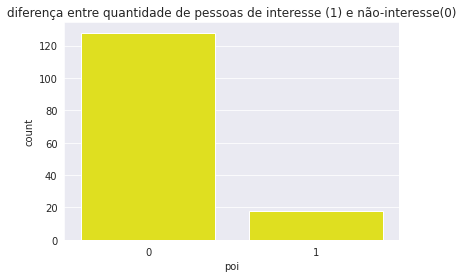

In [ ]:
#visualização da proporção de POI's:
sns.set_style('darkgrid')
sns.countplot(x='poi', data=enron_data, color="yellow")
#Text(0.5, 1.0 'diferença entre quantidade de pessoas de interesse (1) e não-interesse(0)')
plt.title('diferença entre quantidade de pessoas de interesse (1) e não-interesse(0)')
print("pessoas de interesse:  ", sum(enron_data['poi']==1))
print("pessoas de não-interesse:  ", sum(enron_data['poi']==0))

Lembrando que as Pessoas de Interesse serão representadas por '1', e as pessoas de não-interesse por '0'.

##Primeira análise

Primeiramente, vou dispor um gráfico de todas as colunas, para analisar a distribuição dos dados.

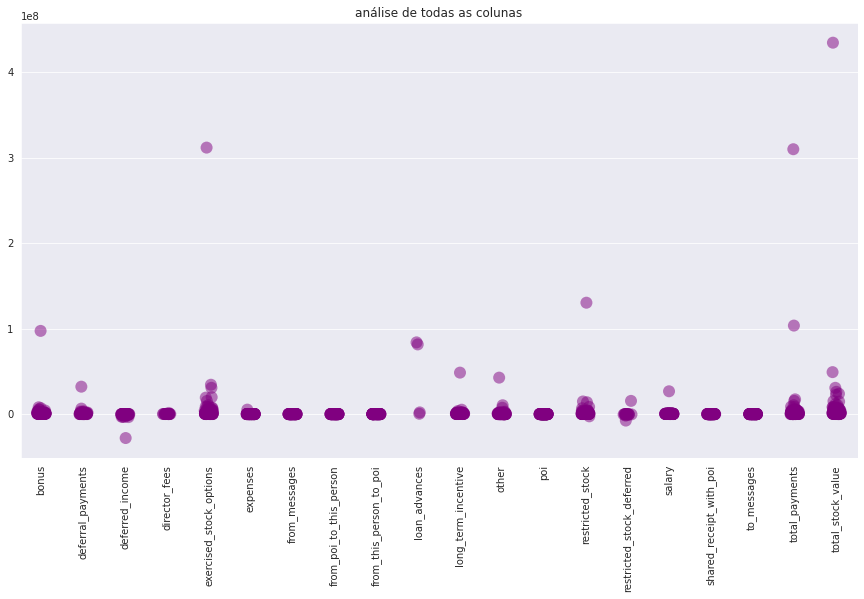

In [ ]:
#Primeira análise superficial para verificação de possíveis outliers
plt.figure(figsize = (15, 8))
plt.xticks(rotation=90)
plt.title('análise de todas as colunas')
sns.stripplot(data=enron_data, color="purple",size=12, alpha=0.5)



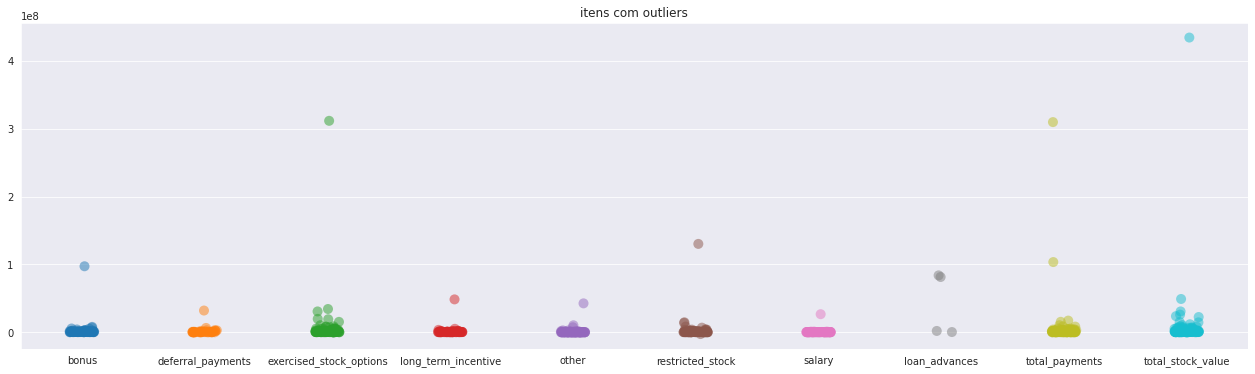

In [ ]:
#Análise mais próxima dos itens com resultados fora dos parâmetros esperados
sus_data=enron_data[['bonus', 'deferral_payments','exercised_stock_options', 'long_term_incentive', 'other','restricted_stock','salary', 'loan_advances','total_payments', 'total_stock_value',]]
plt.figure(figsize = (22, 6))
plt.title('itens com outliers')
sns.stripplot( data=sus_data, size=10, alpha=0.5)

Há aproximadamente 1 outlier em cada um deles. Vamos investigar a quem pertencem e se são referentes a uma mesma pessoa.

# Análise de outliers: Bônus

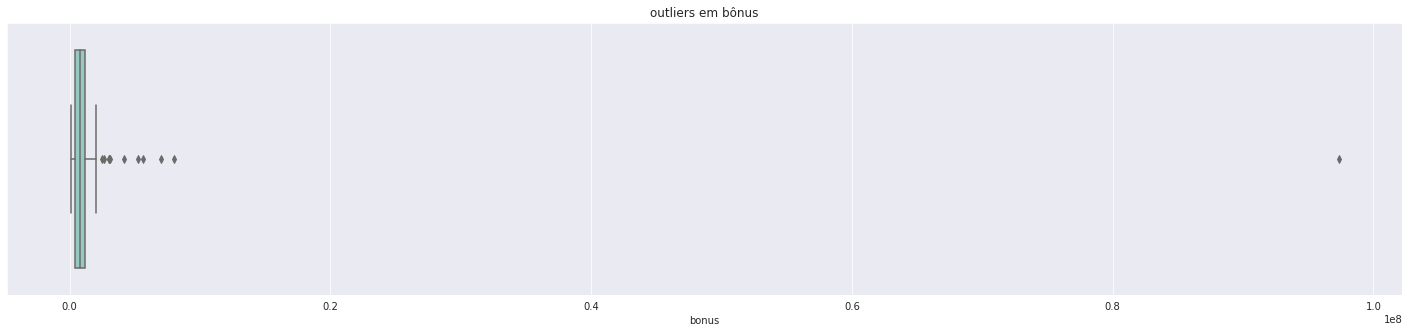

In [ ]:
#na minha primeira análise escolhi elaborar um boxplot nos bônus, com um outlier bem distante
plt.figure(figsize = (25, 5))
plt.title('outliers em bônus')
ax = sns.boxplot( x="bonus",
                 data=enron_data, palette="Set3")

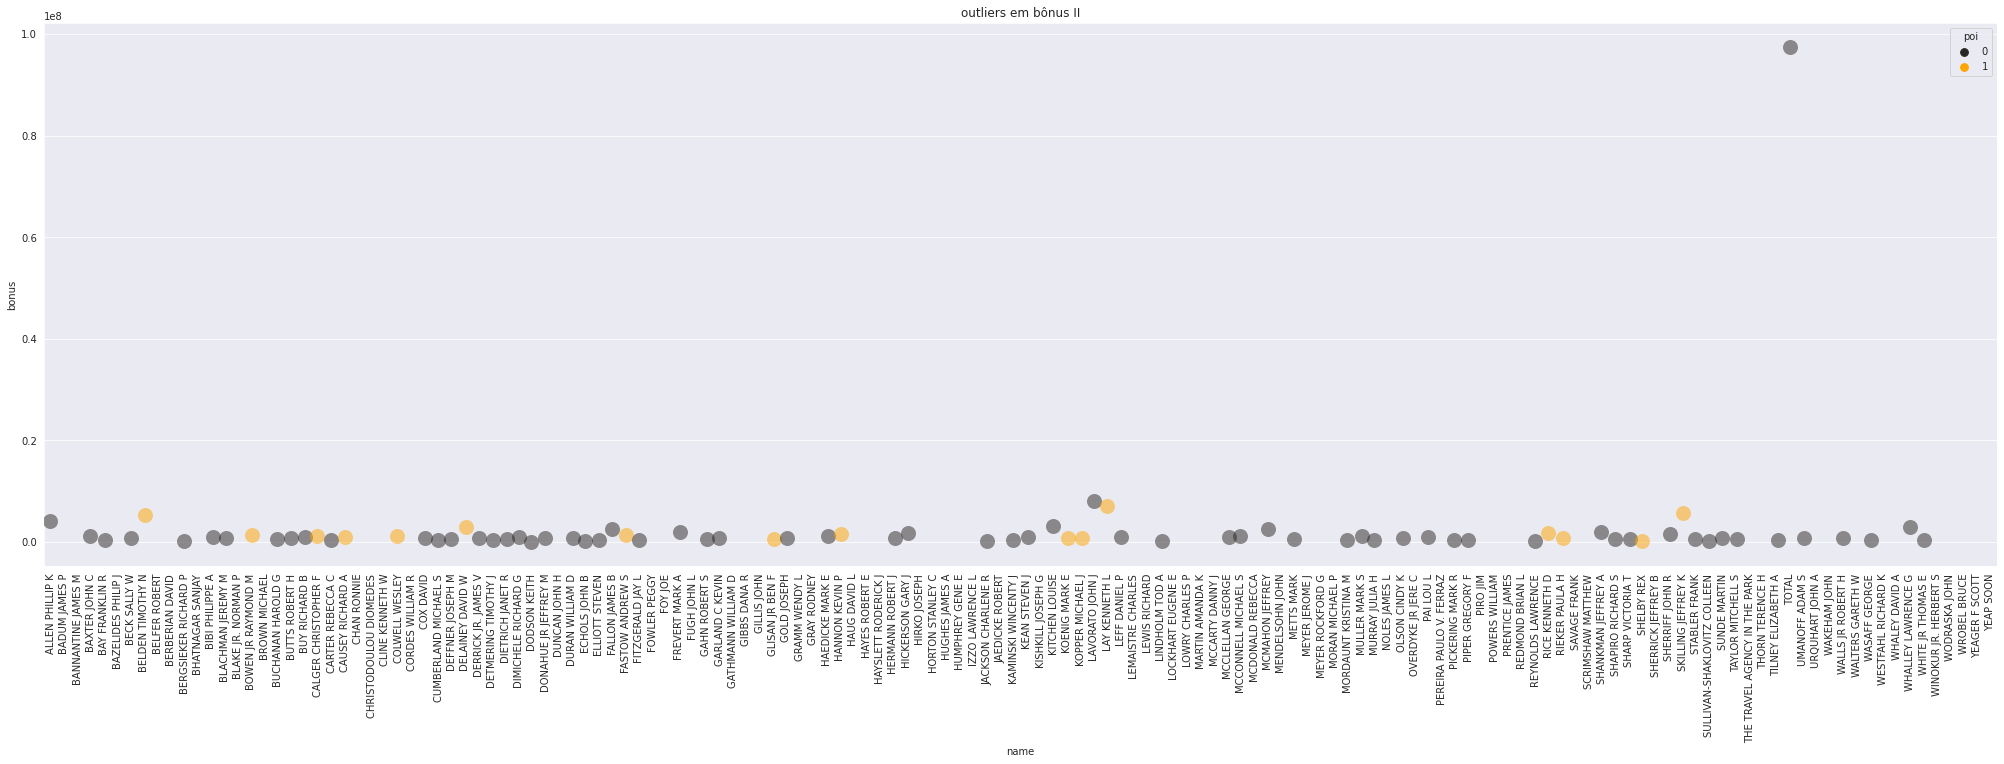

In [ ]:
#para melhor análise, em relação aos seus nomes:
plt.figure(figsize = (35, 10))
plt.title('outliers em bônus II')
plt.xticks(rotation=90)
sns.stripplot(data=enron_data, x='name' ,y='bonus', color="orange", size=15, hue='poi', alpha=0.5)
#sns.histplot(data=enron_data, x='name' ,y='bonus', color="orange", hue='poi')

Ainda fica difícil de entender, existem muitos nomes no gráfico. Vou separar os maiores valores, para dar um efeito "zoom".

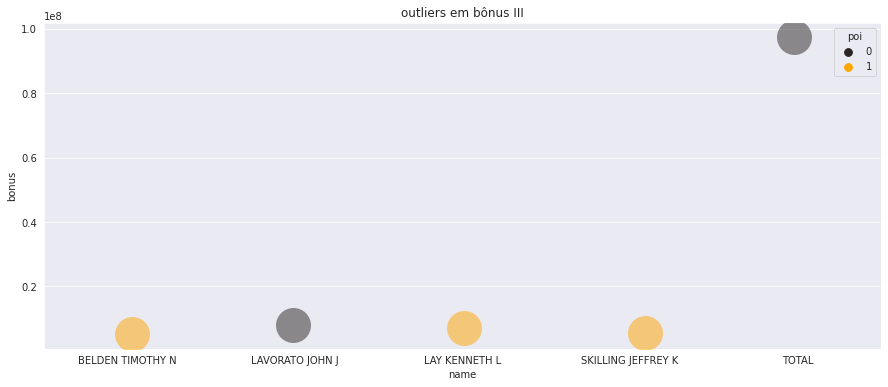

In [ ]:
#identificando os maiores bônus
top_bonus = enron_data[enron_data['bonus']>5000000]
plt.figure(figsize = (15, 6))
plt.title('outliers em bônus III')
sns.set_style('darkgrid')
sns.stripplot(data=top_bonus, x='name' ,y='bonus', color="orange", size=35, hue='poi', alpha=0.5)

\Após a análise, vemos que o valor mais alto se refere ao '**total**', não tem relação com atividades dos funcionários. Posso excluir.

In [ ]:
enron_data.drop([130], inplace=True)
#aproveito para excluir a coluna 'email', não será relevante ao estudo.
enron_data.drop("email_address", axis=1, inplace=True)

**OBSERVAÇÃO:**

Ao topo gráfico, temos John Lavorato com um alto bônus, mas não é considerando uma POI. Lavorato era um alto executivo no ramo de comércio de energia da Enron e recebeu grandes bônus para impedi-lo de deixar a empresa. Como não é uma pessoa de interesse e o bônus acaba distorcendo seus valores totais, acho que seria apropriado **removê-lo** do conjunto de dados.

 Abaixo, temos Kenneth, Jeffrey e Timothy, que são POI's. É importante guardar esses nomes.

In [ ]:
#Removendo John Lavorato do dataframe:
enron_data.drop([78], inplace=True)

Com a remoção de dois outliers, veremos quantos restam e o quanto isso afeta os outros dados:

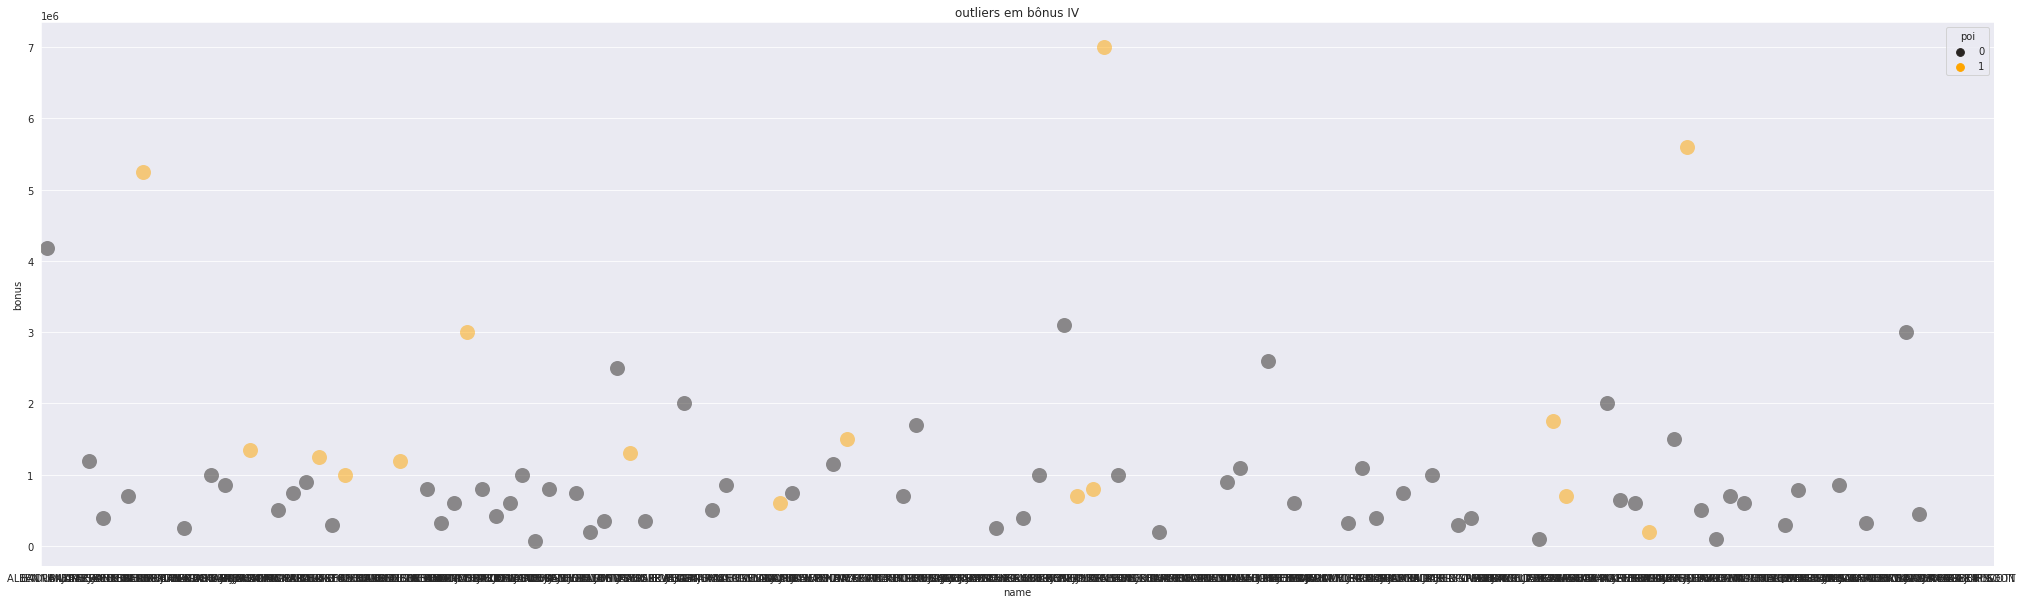

In [ ]:
# nova análise dos bônus, com remoção do oulier 'total' e o funcionário Lavorato:
plt.figure(figsize = (35, 10))
plt.title('outliers em bônus IV')
sns.stripplot(data=enron_data, x='name' ,y='bonus', color="orange", size=15, hue='poi', alpha=0.5)


Assim, fica visível que os três maiores bônus estão relacionados com três pessoas de interesse, representados pelas bolinhas amarelas.

Agora quero voltar no gráfico dos outliers absurdos e verificar se eram todos causados pelo 'total'.

# Análise dos demais outliers

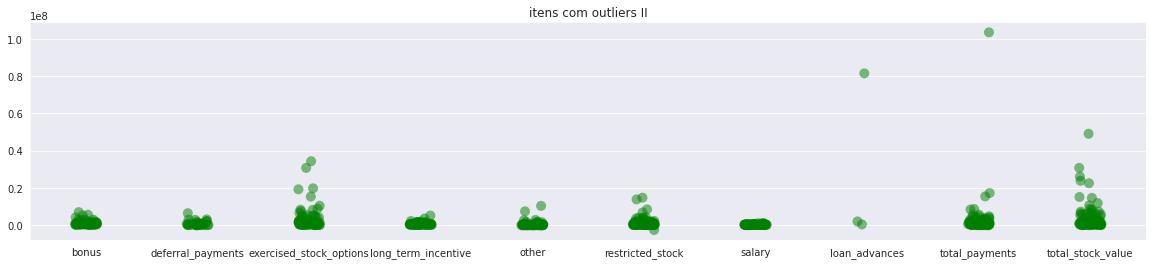

In [ ]:
#nova análise dos campos anteriores com outliers sns.stripplot( data=outlier_data, size=12)
plt.figure(figsize = (20, 4))
plt.title('itens com outliers II')
sns.stripplot( data=enron_data[['bonus', 'deferral_payments','exercised_stock_options', 'long_term_incentive', 'other','restricted_stock','salary', 'loan_advances','total_payments', 'total_stock_value',]], color="green", size=10, alpha=0.5)

'total_payments' ainda possui um resultado extremamente fora do esperado, mesmo após a remoção dos valores. Pode ser relacionado à fraudes de POI's, vale ir mais a fundo.

In [ ]:
#verificando valor do outlier em 'total payments' 
for x in enron_data['total_payments']:
    if x>100000000 :
        print("Outlier: ", x)

Outlier:  103559793.0


Olhando mais de perto, lozalizamos a quem pertence esse valor:

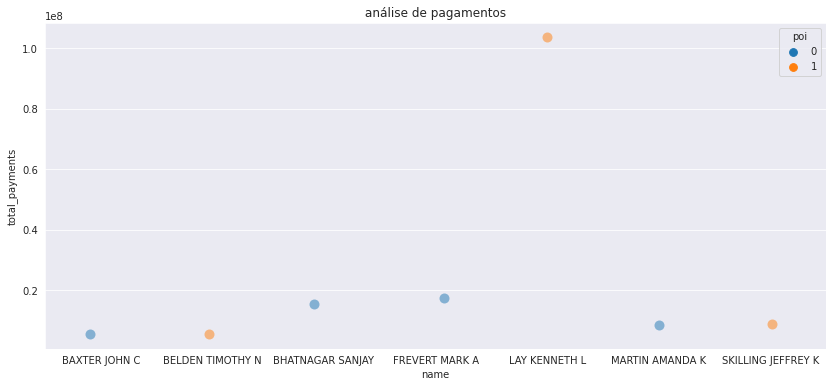

In [ ]:
#localizando mais de perto:
top_tpay = enron_data[enron_data['total_payments']>5000000]
plt.figure(figsize = (14, 6))
plt.title(" análise de pagamentos ")
sns.stripplot(data=top_tpay, y= 'total_payments' ,x="name", hue='poi',size=10, alpha=0.5)


Concluímos que conforme suposto, o grande valor representava **Kenneth Lay**, uma pessoa de interesse. Logo abaixo, também temos novamente **Jeffrey Skilling** e **Timothy Belden**. 

Retirei os campos onde não haviam valores tão extremos, agora vamos utilizar estes stripplots: 

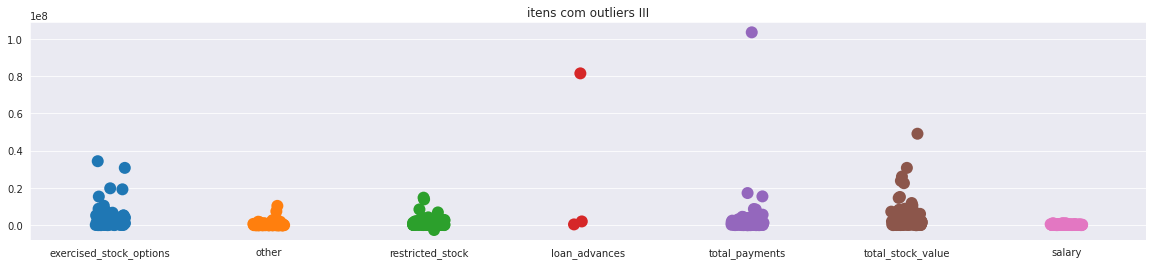

In [ ]:
#nova análise dos campos anteriores com outliers
plt.figure(figsize = (20, 4))
plt.title('itens com outliers III')
outlier_data =enron_data[[ 'exercised_stock_options', 'other','restricted_stock', 'loan_advances','total_payments', 'total_stock_value','salary',]]
sns.stripplot( data=outlier_data, size=12)


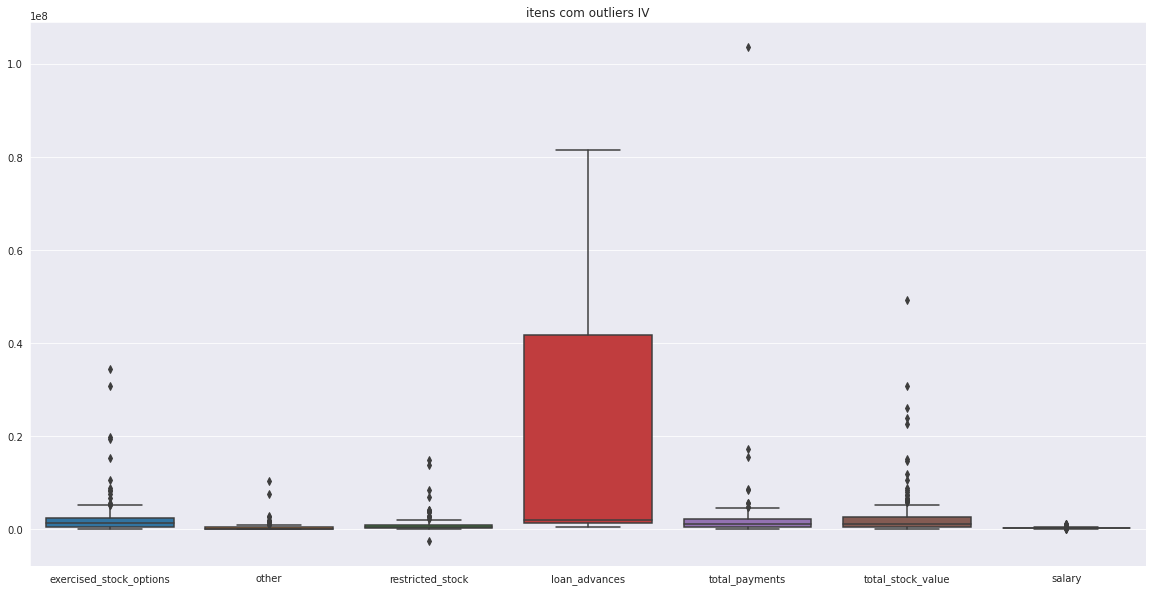

In [ ]:
#Boxplot para melhor representação da existência dos outliers:
plt.figure(figsize = (20, 10))
plt.title('itens com outliers IV')
sns.boxplot( data=outlier_data)

Em seguida, Vou estudar cada uma dessas 6 áreas diretamente, mais de perto e focando nos outliers.

Primeiramente, a quantidade de ações possuídas por cada um:

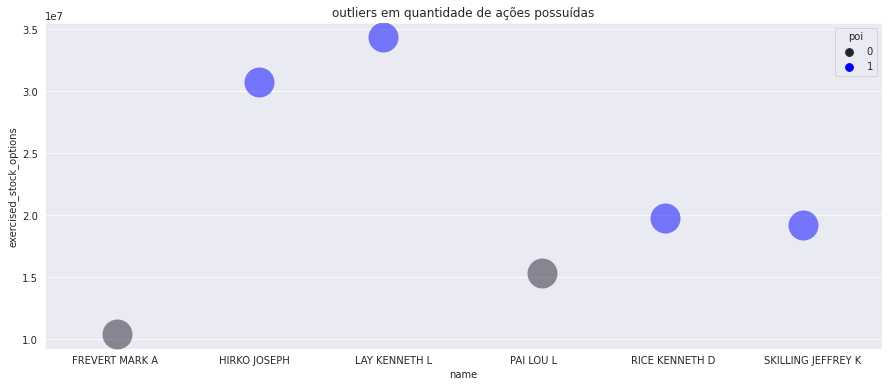

In [ ]:
top_stock = enron_data[enron_data['exercised_stock_options']>10000000]
plt.figure(figsize = (15, 6))
plt.title('outliers em quantidade de ações possuídas')
sns.stripplot(data=top_stock, x='name' ,y='exercised_stock_options', color="blue", size=30, hue='poi', alpha=0.5)

Outros itens financeiros, como: serviços de consultoria, apoio financeiro para moradia, reembolso de impostos e demais benefícios financeiros.

In [ ]:
top_other = enron_data[enron_data['other']>1000000]
plt.figure(figsize = (15, 6))
plt.title('outliers em outros serviços financeiros')
sns.stripplot(data=top_other, x='name' ,y='other', color="orange", size=30, hue='poi', alpha=0.5)

Os valores brutos das ações e dividendos de cada funcionário:

In [ ]:
top_defpay = enron_data[enron_data['restricted_stock']>4000000]
plt.figure(figsize = (15, 6))
plt.title('outliers em valor bruto de ações e dividendos')
sns.stripplot(data=top_defpay, x='name' ,y='restricted_stock', color="green", size=30, hue='poi', alpha=0.5)

O valor total das ações:

In [ ]:
top_stkvalue = enron_data[enron_data['total_stock_value']>10000000]
plt.figure(figsize = (15, 6))
plt.title('outliers em valor total de ações')
sns.stripplot(data=top_stkvalue, x='name' ,y='total_stock_value', color="brown", size=15, hue='poi', alpha=0.5)

Por último, os salários-base dos funcionários:

In [ ]:
top_salary = enron_data[enron_data['salary']>600000]
plt.figure(figsize = (25, 6))
plt.title('outliers em salários-base')
sns.stripplot(data=top_salary, x='name' ,y='salary', color="red", size=15, hue='poi', alpha=0.5)

**OBERVAÇÃO:**

Após essas análises, podemos concluir que os valores mais altos **sempre** estão relacionados com POI's, com destaque para Kenneth Lay.



# Análise de Mensagens

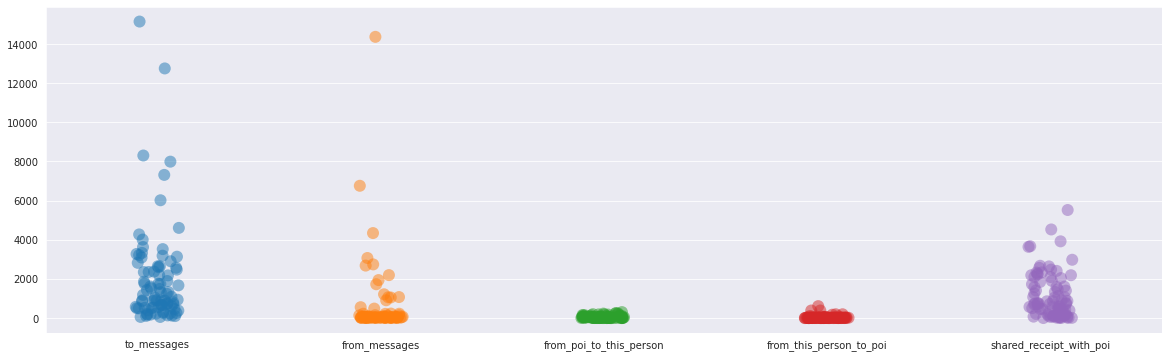

In [ ]:
message_data = enron_data[['to_messages','from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi' ]]
plt.figure(figsize = (20, 6))
sns.stripplot(data=message_data, size=12, alpha=0.5)

Após esse gráfico, analisei cada um dos campos acima e não encontrei nada com extremo destaque aos POI's, portanto vou poupar seu tempo em ohar mais cinco gráficos.

#Análise de outras características

Para fechar minha análise: O que uma pessoa comentendo fraudes faria? Escolhi algumas colunas do dataframe que podem ter algo:

'loan advances' - adiantamentos de empréstimos

'director fees' - pagamentos realizados para diretores que não eram funcionários da empresa.




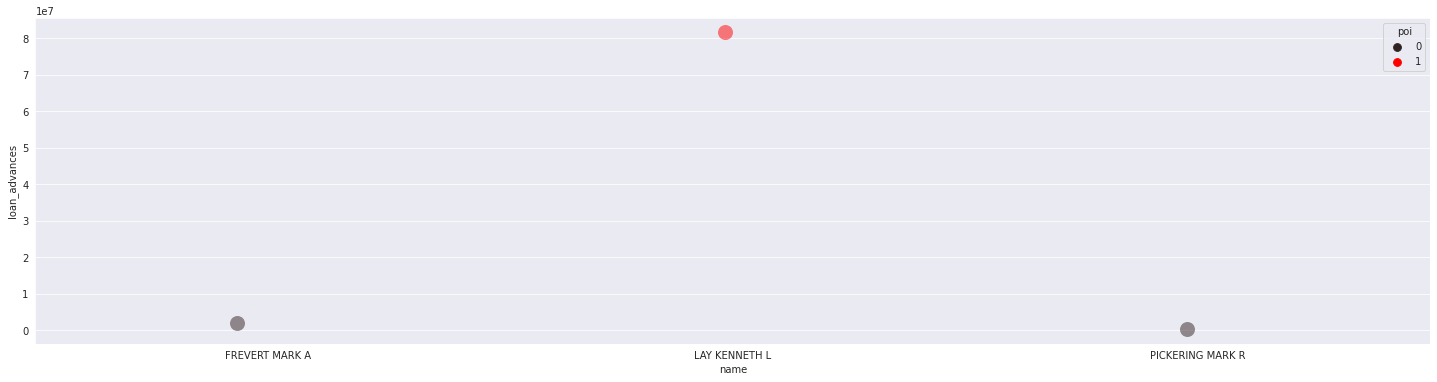

In [ ]:
top_loan = enron_data[enron_data['loan_advances']>1]
plt.figure(figsize = (25, 6))
sns.stripplot(data=top_loan, x='name' ,y='loan_advances', color="red", size=15, hue='poi', alpha=0.5)

Como esperando, encontramos Lay novamente.

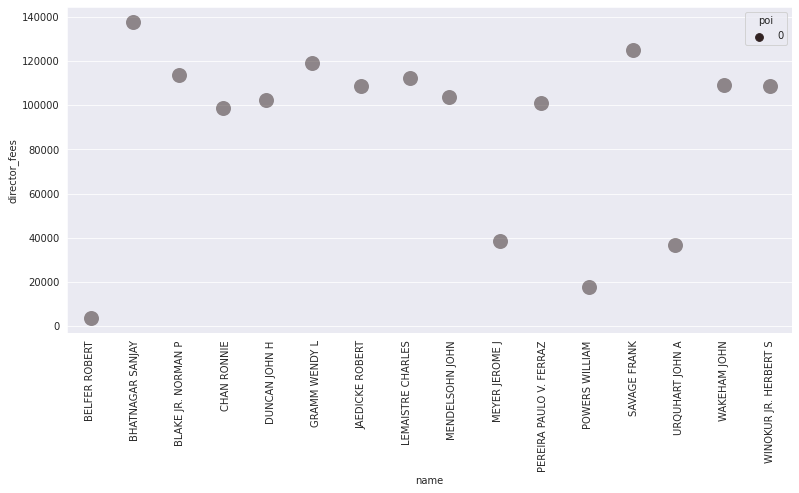

In [ ]:
#análise director_fees
top_fees = enron_data[enron_data['director_fees']>1]
plt.figure(figsize = (13, 6))
plt.xticks(rotation=90)
sns.stripplot(data=top_fees, x='name' ,y='director_fees', color="red", size=15, hue='poi', alpha=0.5)

nada interessante aqui.

A seguir, quis tentar obter uma relação entre as pessoas que posuíam um grande incentivo de longo prazo, juntamente com suas ações e a possibilidade de serem POI's.

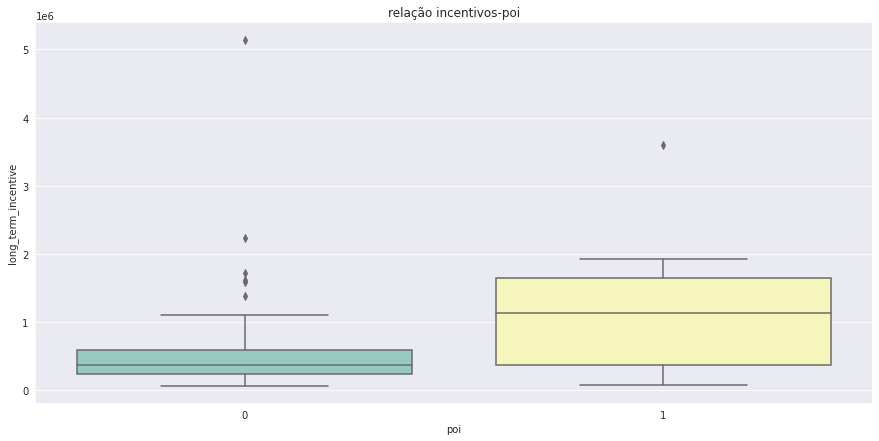

In [ ]:
#análise incentivos-poi
plt.figure(figsize = (15, 7))
plt.title('relação incentivos-poi')
ax = sns.boxplot( x="poi", y='long_term_incentive',
                 data=enron_data, palette="Set3")

<Figure size 720x432 with 0 Axes>

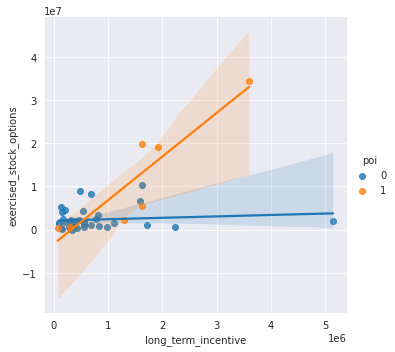

<Figure size 720x432 with 0 Axes>

In [ ]:
#análise relação incentivos-salário
sns.lmplot(x="long_term_incentive", y="exercised_stock_options", hue="poi", data=enron_data)
plt.figure(figsize = (10, 6))


O implot nos mostra que, para as pessoas de interesse, as ações tendem a aumentar conforme o aumento dos incentivos de longo prazo, ao contrário das pessoas de não-interesse.

# Conclusão

Após a análise de todos estes componentes, fica claro quem foram os principais responsáveis pelo caso.

**Kenneth Lay**, o CEO da Enron de 1986 a 2001, presidiu muitas das ativações comerciais ilegais e, portanto, é uma das pessoas mais vitais de interesse, entando muito presente nas análises. Condenado em dez processos por fraude e conspiração, Lay aguardava em liberdade a definição da pena, prevista para outubro. Podia pegar 165 anos de reclusão, mas faleceu em 2006.

Já **Jeffrey Skilling** substituiu Kenneth Lay como CEO da Enron em 2001 e orquestrou grande parte da fraude que a destruiu. Skilling foi multado em **45 milhões de dólares** e atualmente está cumprindo uma sentença de 24 anos em uma prisão federal.

**Timothy Belden** foi o ex-chefe de comércio da Enron que desenvolveu uma estratégia para aumentar ilegalmente os preços da energia na Califórnia

O caso só foi descoberto em 2001, quando o mercado de ações sofreu uma grave deterioração, fazendo com que investidores e analistas estudassem as finanças da Enron com mais afinco.